In [1]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv('C:\\Users\Debodeep\Documents\Sapienza Learning Materials\ADM\ADMHw4\wine.txt',header=None)
data.columns=['class','Alcohol','Malic_acid','Ash','Alcalinity_of_ash','Magnesium','Total_phenols','Flavanoids','Nonflavanoid_phenols','Proanthocyanins','Color_intensity','Hue','OD280/OD315_of_diluted_wines','Proline']
#data= data.drop('class', 1)
#data= data.drop(columns=[0])
data.head()

,class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
class K_Means:
    def __init__(self, k=3, bound=0.000001, iter=1000):
        self.k = k
        self.bound = bound
        self.iter = iter

    def setup(self,data):
        
        # Defining the centroids
        self.centers = {}
        for i in range(self.k):
            self.centers[i] = data[i]
        for i in range(self.iter):
            
        # Defining the distances
            self.classes = {}
            for i in range(self.k):
                self.classes[i] = []
            for attributes in data:
                distances = [np.linalg.norm(attributes-self.centers[centroid]) for centroid in self.centers]
                classification = distances.index(min(distances))
                self.classes[classification].append(attributes)
            prev_centers = dict(self.centers)
            for classification in self.classes:
                self.centers[classification] = np.average(self.classes[classification],axis=0)
                
        # Setting up the optimizing condition
            optimized = True
            for c in self.centers:
                original_centroid = prev_centers[c]
                current_centroid = self.centers[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.bound:
                    print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False
            if optimized:
                break

In [4]:
# Defining the colors for the plots
colors = ["red","green","blue","black"]

### As it is impossible to plot all the 13 attributes altogether, we will try with 2,3 and 4 attributes


In [5]:
# Considering 2 attributes
df1 = np.array(data[['Alcohol','Color_intensity']])

In [6]:
clf=K_Means()
clf.setup(df1)

15.185140487617984
29.351463023486694
0.025645322840822493
19.227453663020274
4.426556133176694
1.4235020952712014


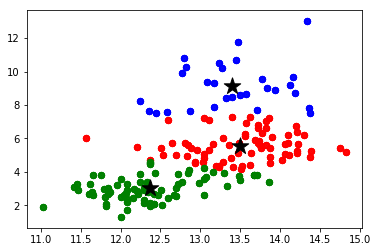

In [7]:
for classification in clf.classes:
    color = colors[classification]
    for attributes in clf.classes[classification]:
        
        for i in range(3):
            plt.scatter(attributes[0], attributes[1],marker='.', color=colors[classification], s=20, linewidths=5)

        
for centroid in clf.centers:
    plt.scatter(clf.centers[centroid][0], clf.centers[centroid][1],
                marker="*", color='black', s=300, linewidths=1)
        
plt.show()

In [8]:
# Considering 3 attributes
df2 = np.array(data[['Alcohol','Alcalinity_of_ash','Ash']])

In [9]:
clf=K_Means()
clf.setup(df2)

8.698854364742218
2.1499917855129693
4.130656682094469
2.460540739780848
7.727449780919908
2.1195503296538427
0.45761447580784315
3.8739535060617483
2.462020970125483
0.4258701709782997
3.6347226015617657
2.195802618267747
1.8965830402793402
2.7290275408115523
0.003581254735074252
1.9402624066446885
4.306659077805101
1.1972946017567645
0.9672507278453553
4.639065364629241
0.5617715973939776
2.716039086364893
1.175107646901978
1.1574195962195333
0.01125411888046618
2.4989595571746923
0.3181127561811937
0.07695018656293054
0.5307628605317133
0.615614180026842
0.9559196867059204
0.6596738235512436
0.3333043609304735
1.1048933058613306
1.6655732442353945
3.032656871285079
0.045260588257060225
0.3074051664301999
0.6434568331179567
0.09633827768737843
0.20195533017436998
0.7344302149044122
1.0895410583595413
2.545654758395016
0.08066992832591673
0.569462534920947
0.1847768951751228
0.053495580280443475


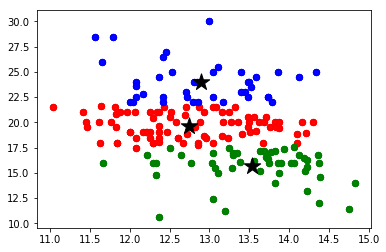

In [10]:
for classification in clf.classes:
    color = colors[classification]
    for attributes in clf.classes[classification]:
        
        for i in range(3):
            plt.scatter(attributes[0], attributes[1],marker='.', color=colors[classification], s=20, linewidths=5)

        
for centroid in clf.centers:
    plt.scatter(clf.centers[centroid][0], clf.centers[centroid][1],
                marker="*", color='black', s=300, linewidths=1)
        
plt.show()

In [14]:
# Considering 4 attributes
df3 = np.array(data[['Alcohol','Alcalinity_of_ash','Ash','Total_phenols']])

In [15]:
clf=K_Means()
clf.setup(df3)

14.04476631442775
1.169331597292882
12.637897542113926
1.771632861304508
0.044396393404523504
2.2473589217207035
0.8747100003901096
4.915092829097442
2.452392337840773
1.6498426464756075
0.7168861523850065
2.7063886923589155
2.0690053946038836
5.7189770082220335
1.8371022197099052
0.4727678500643766
0.9730911050286284
2.604417433612442
0.8680411343444923
0.47061491142707007
0.7018458934078075
2.504108872322222
0.4292642009417311
1.4213824892571605
0.6930919630442255
0.728911725131443
4.2316668752049305


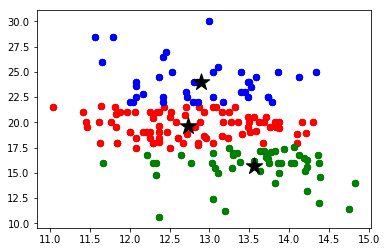

In [16]:
for classification in clf.classes:
    color = colors[classification]
    for attributes in clf.classes[classification]:
        
        for i in range(3):
            plt.scatter(attributes[0], attributes[1],marker='.', color=colors[classification], s=20, linewidths=5)

        
for centroid in clf.centers:
    plt.scatter(clf.centers[centroid][0], clf.centers[centroid][1],
                marker="*", color='black', s=300, linewidths=1)
        
plt.show()